In [3]:
import cv2
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from skimage.feature import hog

In [4]:
image_color = cv2.imread('truck_free_s.jpg')
cv2.imshow('Find truck corners', image_color)
cv2.waitKey()
cv2.destroyAllWindows()

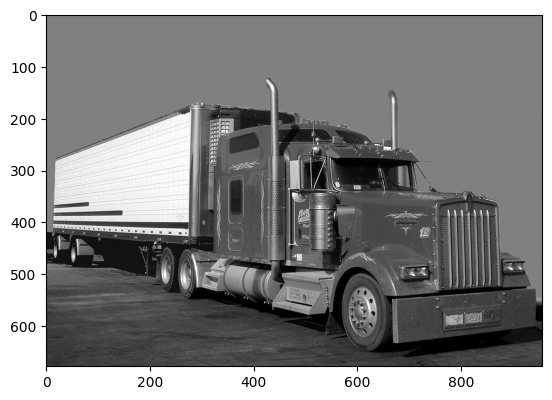

In [5]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = 'gray')


In [6]:
#sobel calculaions
x_sobel = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize = 7)
cv2.imshow('Sobel - X direction', x_sobel)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
# Sobel Calculations
y_sobel = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize = 7)
cv2.imshow('Sobel - Y direction', y_sobel)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
# Perform histogram of oriented gradient
features, hog_image = hog(image_gray, 
                                   orientations = 9, 
                                   pixels_per_cell = (16, 16), 
                                   cells_per_block = (1, 1), 
                                   transform_sqrt = False, 
                                   visualize = True, 
                                   feature_vector = False)

features.shape 

(42, 59, 1, 1, 9)

In [11]:
features[30,50,:]

array([[[0.62049729, 0.25487372, 0.07395602, 0.16299491, 0.15378672,
         0.18936363, 0.13930874, 0.2324928 , 0.62049729]]])

In [12]:
hog_image.shape

(678, 957)

In [13]:
from skimage import exposure

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,2))

Text(0.5, 1.0, 'HOG Features')

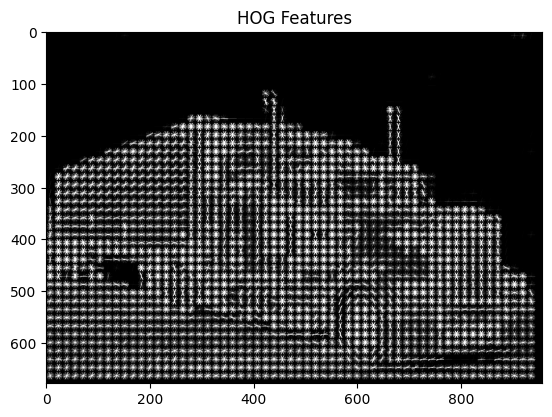

In [14]:
plt.figure()
plt.imshow(hog_image_rescaled, cmap = 'gray')
plt.title('HOG Features')
